<a href="https://colab.research.google.com/github/NAGENDRA-ARASAN-K/DSP-PROJECT/blob/main/Copy_of_Self_Audio_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <h1> Audio Signal Processing </h1>
    <h4> (This notebook is only meant for Audio Signal Analysis) </h4>
</left>


In [ ]:
from google.colab import files

from IPython.display import Audio, display
import IPython.display as ipd

import librosa
from librosa import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load a audio file
audio_file = files.upload()

In [ ]:
!ls

LJ037-0171.wav	sample_data


In [ ]:
#Audio controls being displayed in the frontend (only works in the notebook).
ipd.Audio('/content/LJ037-0171.wav')

In [ ]:
?librosa.load

In [ ]:
#Load an audio file as a floating point time series
audio_sig, sampling_rate = librosa.load('/content/LJ037-0171.wav', sr=None)

In [ ]:
#Dispaly Numpy 1d array containing the desired waveform (mono)
audio_sig

array([-4.5776367e-04, -4.2724609e-04, -1.8310547e-04, ...,
        3.0517578e-05, -9.1552734e-05, -9.1552734e-04], dtype=float32)

In [ ]:
audio_sig.shape

(167226,)

In [ ]:
sampling_rate

22050

In [ ]:
#Display as One-dimensional ndarray with axis labels (including time series).
pd.Series(audio_sig)

0        -0.000458
1        -0.000427
2        -0.000183
3        -0.000061
4        -0.000275
            ...   
167221   -0.000702
167222   -0.000153
167223    0.000031
167224   -0.000092
167225   -0.000916
Length: 167226, dtype: float32

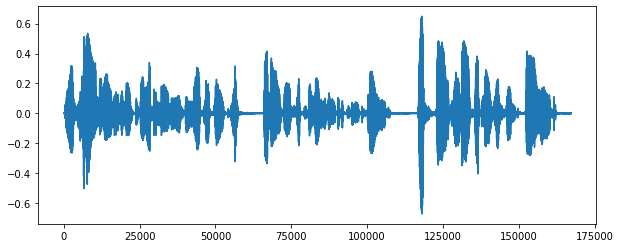

In [ ]:
#plot the raw audio using pd.Series plot
pd.Series(audio_sig).plot(figsize=(10,4))

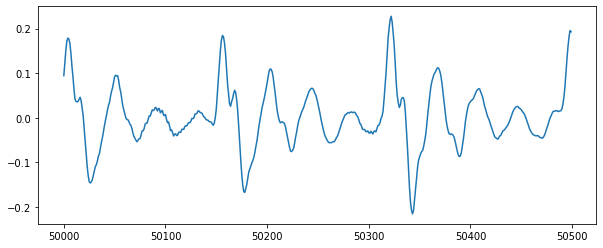

In [ ]:
pd.Series(audio_sig)[50000:50500].plot(figsize=(10,4))

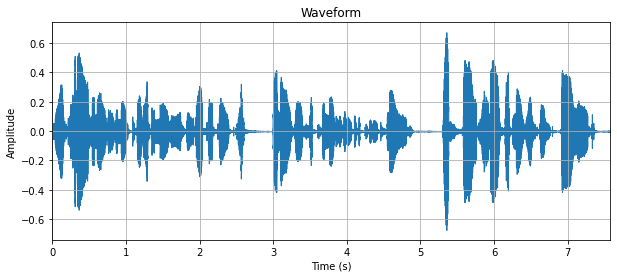

In [ ]:
#plot the raw audio signal using librosa
plt.figure(figsize=(10,4))
librosa.display.waveplot(audio_sig)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.savefig('waveform.png', dpi=100)
plt.grid()
plt.show()


<left>
    <h1> Fast Fourier Transform </h1>
</left>



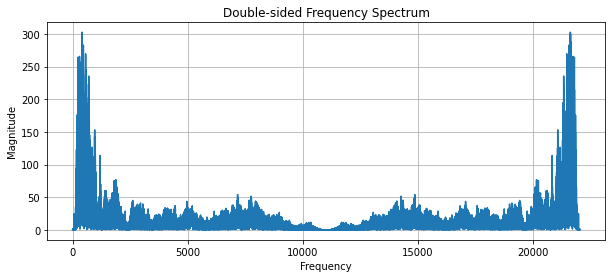

In [ ]:
# perform Fourier transform
audio_fft = np.fft.fft(audio_sig)
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(audio_fft)
# create frequency variable
f = np.linspace(0, 22050, len(spectrum))
# plot spectrum
plt.figure(figsize=(10,4))
plt.plot(f, spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Double-sided Frequency Spectrum")
plt.grid()
plt.savefig('audio_FFT_II.png')
plt.show()

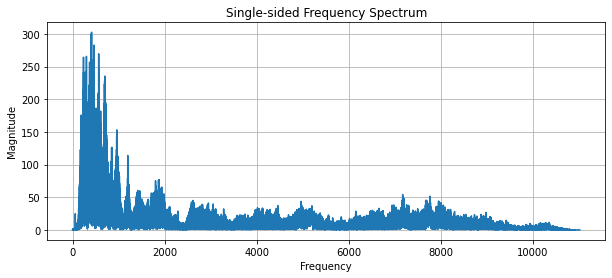

In [ ]:
# perform Fourier transform
audio_fft = np.fft.fft(audio_sig)
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(audio_fft)
# create frequency variable
f = np.linspace(0, 22050, len(spectrum))
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.figure(figsize=(10,4))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Single-sided Frequency Spectrum")
plt.grid()
plt.savefig('audio_FFT_I.png')
plt.show()

In [ ]:
# maximum frequency for the frequency Band(B)
round(max(left_f))

11025

In [ ]:
# Display the complex series
audio_fft

array([ 0.20602417+1.95399252e-14j,  0.40807247-5.31412537e-01j,
       -0.19988977+9.41303654e-01j, ...,  0.04413234-5.84189320e-01j,
       -0.19988977-9.41303654e-01j,  0.40807247+5.31412537e-01j])

In [ ]:
audio_fft.shape

(167226,)


<left>
    <h1> Short-Time Fourier Transform </h1>
</left>






In [ ]:
?librosa.stft

In [ ]:
audio_stft = librosa.stft(audio_sig)

In [ ]:
audio_stft.shape

(1025, 327)

In [ ]:
audio_stft

array([[-3.5194013e-02+0.0000000e+00j, -1.8724676e-02+0.0000000e+00j,
         2.6078820e-03+0.0000000e+00j, ...,
        -2.5594935e-03+0.0000000e+00j,  5.7159219e-04+0.0000000e+00j,
         1.6568750e-02+0.0000000e+00j],
       [ 3.2590222e-02+2.6285126e-17j,  4.0223086e-03+1.9506536e-02j,
        -3.3896330e-03-1.9706958e-03j, ...,
         1.1300655e-03+2.9286850e-04j,  2.2432294e-03+1.5831154e-03j,
        -9.6692108e-03+1.4359633e-02j],
       [-1.3500722e-02-1.9393536e-17j,  3.4473869e-03-1.1669015e-02j,
         6.8981601e-03+4.7203051e-03j, ...,
        -5.7383551e-04-8.4512483e-04j,  3.3170788e-04+9.6382381e-04j,
        -6.2980023e-03-1.5694393e-02j],
       ...,
       [ 5.4311543e-04-1.3011736e-18j, -6.3587760e-04+2.8007408e-04j,
         2.6073511e-04-9.4373320e-04j, ...,
        -3.8760412e-05-6.6467564e-06j, -3.0869039e-04+1.9949033e-04j,
         3.8301194e-04-1.2655015e-04j],
       [-1.6197024e-04+1.6310466e-17j,  1.6235601e-04-1.5002683e-04j,
         1.3873682e-05

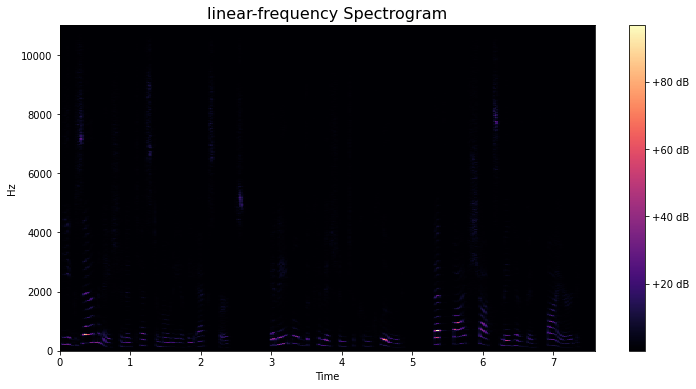

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
img = librosa.display.specshow(np.abs(audio_stft), x_axis='time', y_axis='linear',ax=ax)
ax.set_title('linear-frequency Spectrogram', fontsize=16)
plt.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig('LinFS.png')
plt.show()

In [ ]:
?librosa.amplitude_to_db

In [ ]:
S_dB = librosa.amplitude_to_db(np.abs(audio_stft),ref=np.max)

In [ ]:
S_dB.shape

(1025, 327)

In [ ]:
S_dB

array([[-68.8038  , -74.28489 , -80.      , ..., -80.      , -80.      ,
        -75.34738 ],
       [-69.471436, -73.74873 , -80.      , ..., -80.      , -80.      ,
        -74.966415],
       [-77.12604 , -78.02908 , -80.      , ..., -80.      , -80.      ,
        -75.16984 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

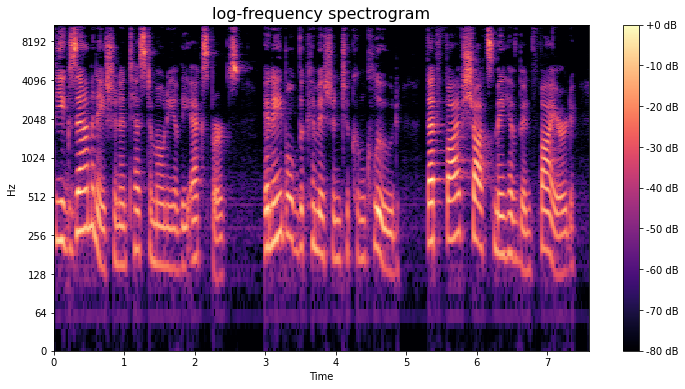

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='log',ax=ax)
ax.set_title('log-frequency spectrogram', fontsize=16)
plt.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig('LogFS.png')
plt.show()


<left>
    <h1> Mel-Spectrogram </h1>
</left>




<left>
    <h3> Design of Mel filter-bank </h3>
</left>

In [ ]:
?librosa.filters.mel

In [ ]:
melfb = librosa.filters.mel(sr=22050, n_fft=2048, n_mels=10)

In [ ]:
melfb.shape

(10, 1025)

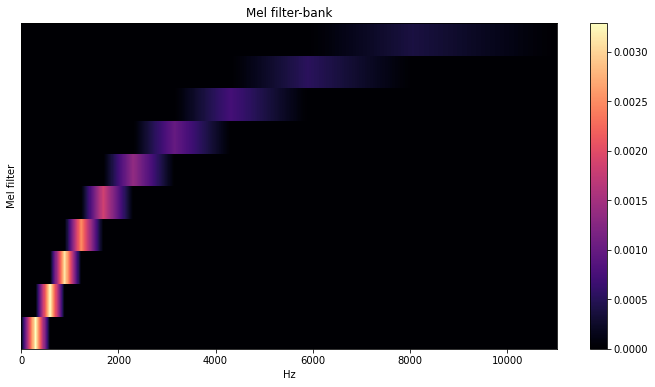

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
img = librosa.display.specshow(melfb, x_axis='linear', ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter-bank')
fig.colorbar(img, ax=ax)
plt.savefig('Mel filter-bank_I.png')
plt.show()

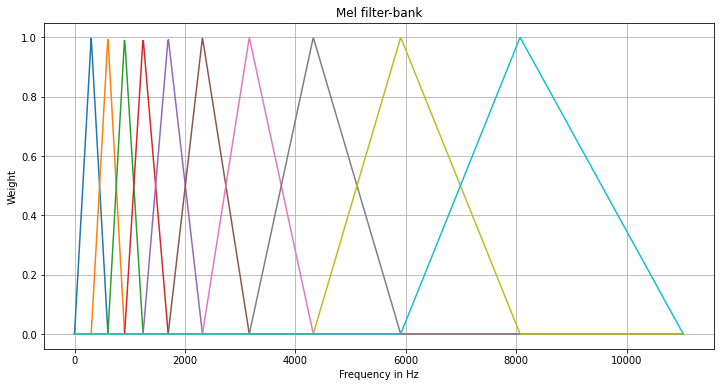

In [ ]:
n_fft=2048
sr=22050
n_mels=10
melfb =librosa.filters.mel(n_fft=n_fft,sr=sr, n_mels=n_mels, norm=None)
f_scale = np.linspace(0,sr/2,int(n_fft/2)+1)
plt.plot(f_scale,melfb.T)
plt.rcParams['figure.figsize']=[12,6]
plt.title('Mel filter-bank')
plt.xlabel('Frequency in Hz')
plt.ylabel('Weight')
plt.grid()
plt.savefig('Mel filter-bank_II.png')
plt.show()

<left>
    <h3> Display Mel-Spectrogram (Directly using librosa function) </h3>
</left>

In [ ]:
?librosa.feature.melspectrogram

In [ ]:
audio_mel = librosa.feature.melspectrogram(y=audio_sig, n_mels=10)

#using default n_mels
audio_mel_128 = librosa.feature.melspectrogram(y=audio_sig, n_mels=128)

In [ ]:
audio_mel.shape
#channels x length

(10, 327)

In [ ]:
audio_mel_128.shape

(128, 327)

In [ ]:
audio_mel

array([[7.7963643e-02, 1.9695262e+00, 7.8382130e+00, ..., 5.9239310e-04,
        6.1788346e-04, 4.1629601e-04],
       [2.1357710e-02, 2.3063558e-01, 1.0710377e+00, ..., 4.6055732e-04,
        4.0477802e-04, 2.3633023e-04],
       [4.0040920e-03, 3.9084628e-03, 5.7470561e-03, ..., 9.0502414e-05,
        9.6951801e-05, 8.1484039e-05],
       ...,
       [3.5197423e-03, 9.5589012e-03, 7.5251646e-02, ..., 3.9883376e-05,
        1.5872016e-04, 2.4030481e-04],
       [1.6018389e-03, 2.3969116e-03, 9.9868616e-03, ..., 1.1966673e-06,
        1.7898603e-06, 2.4494173e-06],
       [1.4360591e-03, 1.9427427e-03, 9.1802152e-03, ..., 7.8512426e-07,
        1.0948652e-06, 1.3593088e-06]], dtype=float32)

<left>
    <h4> Display both Amplitude and Power Spectrum </h4>
</left>

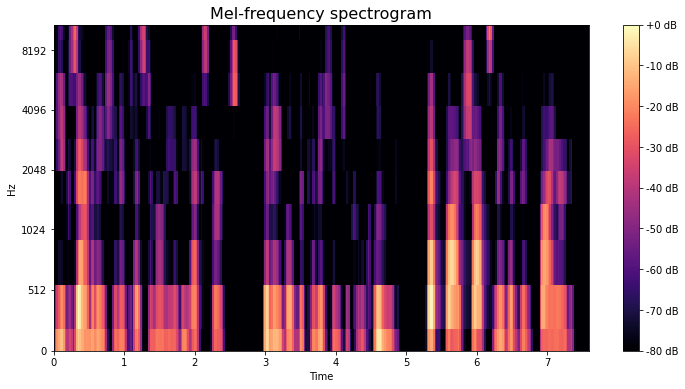

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
M_dB = librosa.amplitude_to_db(audio_mel, ref=np.max)
img = librosa.display.specshow(M_dB,
                               x_axis='time',
                               y_axis='mel', sr=sampling_rate,ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set_title('Mel-frequency spectrogram',fontsize=16)
plt.savefig('MelFS_I.png')
plt.show()

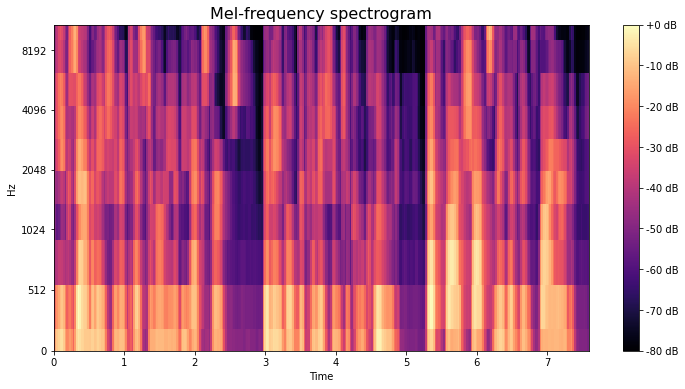

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
M_dB = librosa.power_to_db(audio_mel, ref=np.max)
img = librosa.display.specshow(M_dB,
                               x_axis='time',
                               y_axis='mel', sr=sampling_rate,ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set_title('Mel-frequency spectrogram',fontsize=16)
plt.savefig('MelFS_II.png')
plt.show()


<left>
    <h1> Mel to Audio </h1>
</left>

In [ ]:
S = librosa.feature.inverse.mel_to_stft(audio_mel_128)
y = librosa.griffinlim(S)
ipd.Audio(data=y, rate=22050)

<left>
    <h4> OR </h4>
</left>

In [ ]:
?librosa.feature.inverse.mel_to_audio

In [ ]:
y = librosa.feature.inverse.mel_to_audio(audio_mel_128, sr=22050, n_fft=2048)
ipd.Audio(data=y, rate=22050)

<left>
    <h4> OR </h4>
</left>

In [ ]:
?librosa.griffinlim

In [ ]:
y = librosa.griffinlim(np.abs(audio_stft))
ipd.Audio(data=y, rate=22050)


<left>
    <h1> Phoneme </h1>
</left>

In [ ]:
!pip install phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.8 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 197 kB 31.6 MB/s 
     |████████████████████████████████| 500 kB 48.6 MB/s 
     |████████████████████████████████| 210 kB 54.7 MB/s 
     |████████████████████████████████| 41 kB 507 kB/s 


In [ ]:
!sudo apt-get install espeak

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 4 not upgraded.
Need to get 1,219 kB of archives.
After this operation, 3,031 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsonic0 amd64 0.2.0-6 [13.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak-data amd64 1.48.04+dfsg-5 [934 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libespeak1 amd64 1.48.04+dfsg-5 [145 k

In [ ]:
!sudo apt-get install espeak-ng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  espeak-ng-data libespeak-ng1 libpcaudio0
The following NEW packages will be installed:
  espeak-ng espeak-ng-data libespeak-ng1 libpcaudio0
0 upgraded, 4 newly installed, 0 to remove and 4 not upgraded.
Need to get 3,944 kB of archives.
After this operation, 10.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpcaudio0 amd64 1.0-1 [6,536 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 espeak-ng-data amd64 1.49.2+dfsg-1 [3,469 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libespeak-ng1 amd64 1.49.2+dfsg-1 [187 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak-ng amd64 1.49.2+dfsg-1 [282 kB]
Fetched 3

In [ ]:
from phonemizer import phonemize

text = ["Hello, world!", "Welcome to India"]

phonemized = phonemize(text, language='en-us', backend='espeak')
print(phonemized)

['həloʊ wɜːld ', 'wɛlkʌm tʊ ɪndiə ']


<left>
    <h1> Tokenize Sentence </h1>
</left>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

# Define input sentences
sentences = [
    'i love my dog',
    'I, love my cat'
    ]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 100)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [ ]:
# Define input sentences
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 100)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2, 4], [3, 1, 2, 5], [6, 1, 2, 4]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define your input texts
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 100, oov_token="")

# Tokenize the input sentences
tokenizer.fit_on_texts(sentences)

# Get the word index dictionary
word_index = tokenizer.word_index

# Generate list of token sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Print the result
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)


Word Index =  {'': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [ ]:

# Pad the sequences to a uniform length
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=7)

# Print the result
print("\nPadded Sequences:")
print(padded)



Padded Sequences:
[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [ ]:
# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

# Generate the sequences
test_seq = tokenizer.texts_to_sequences(test_data)

# Print the word index dictionary
print("\nWord Index = " , word_index)

# Print the sequences with OOV
print("\nTest Sequence = ", test_seq)

# Print the padded result
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Word Index =  {'': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]
